In [5]:
import pandas as pd

# Cargar el dataset de Forest Fires
data_ff = pd.read_csv(r'C:\Users\Lenovo\Desktop\MACHINE LEARNING\tarea 4 som y pca\forest fires som\forestfires.csv')

# Visualizar las primeras filas del dataset
print(data_ff.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [6]:
# Información general sobre el dataset
data_ff.info()

# Descripción estadística
data_ff.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
!pip install minisom


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11719 sha256=a227cf5393890178d220f525ec9fe2a9dae16b29dcc526a8bf267bc0acdeea2e
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\8c\22\ac\c0677bb1ddbb1148859f0e2e8375d352512f760c05702075ef
Successfully built minisom


[]

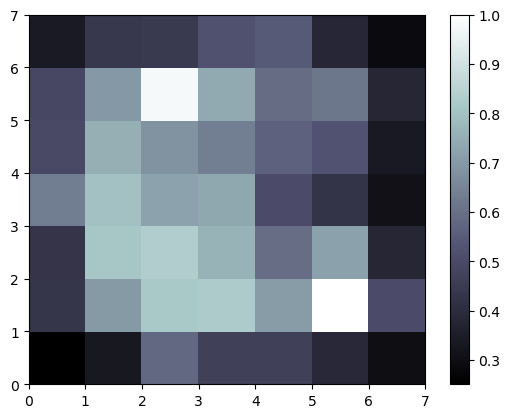

In [9]:
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# Eliminar columnas no numéricas si es necesario (e.g., 'month', 'day')
# Selecciona solo las columnas numéricas para SOM
data_numeric = data_ff.drop(columns=['month', 'day'])

# Normalizar los datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Configurar el SOM
# 7x7 grid y usar 4 características (ajusta si es necesario)
som = MiniSom(x=7, y=7, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Inicializar los pesos del SOM
som.random_weights_init(data_scaled)

# Entrenar el SOM (5000 iteraciones)
som.train_random(data_scaled, 5000)

# Visualizar los resultados: Distancia media
from pylab import plot, bone, colorbar, pcolor

# Dibujar el mapa de distancia media entre los nodos
bone()
pcolor(som.distance_map().T)  # El mapa de distancias muestra la cohesión de cada nodo
colorbar()  # Barra de colores
plot()


In [10]:
# Obtener el nodo ganador para cada muestra
win_map = som.win_map(data_scaled)

# Explorar el nodo ganador de la primera muestra
print(win_map)


defaultdict(<class 'list'>, {(0, 0): [array([0.75      , 0.42857143, 0.87096774, 0.08649207, 0.1013252 ,
       0.09090909, 0.19292605, 0.42352941, 0.7       , 0.        ,
       0.        ]), array([0.625     , 0.14285714, 0.92774194, 0.16884907, 0.10847895,
       0.13903743, 0.41800643, 0.18823529, 0.9       , 0.        ,
       0.00177845]), array([0.625     , 0.42857143, 0.93548387, 0.16264645, 0.10542981,
       0.2228164 , 0.39871383, 0.12941176, 1.        , 0.        ,
       0.00231931]), array([0.875     , 0.57142857, 0.84258065, 0.09200551, 0.40659083,
       0.09447415, 0.09324759, 0.54117647, 0.84444444, 0.        ,
       0.01025815]), array([0.5       , 0.28571429, 0.85806452, 0.01309442, 0.00926469,
       0.11229947, 0.17041801, 0.36470588, 0.84444444, 0.        ,
       0.02222141]), array([0.625     , 0.42857143, 0.9316129 , 0.06133701, 0.02662132,
       0.1426025 , 0.20900322, 0.42352941, 0.6       , 0.        ,
       0.        ]), array([0.75      , 0.28571429, 0

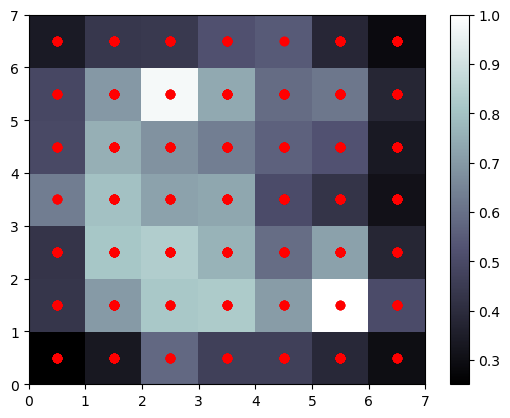

In [11]:
from pylab import plot, bone, colorbar, pcolor

# Visualizar el mapa de distancias (también conocido como U-matrix)
bone()  # Base para el mapa
pcolor(som.distance_map().T)  # Distancias entre los nodos
colorbar()  # Barra de colores

# Visualizar los hits en el mapa SOM
for i, x in enumerate(data_scaled):
    w = som.winner(x)  # Nodo ganador
    plot(w[0] + 0.5, w[1] + 0.5, 'ro')  # Marca los puntos en el mapa (rojo)


In [12]:
nodo_00 = win_map[(0, 0)]
print(nodo_00)  # Muestra las observaciones asignadas al nodo (0,0)


[array([0.75      , 0.42857143, 0.87096774, 0.08649207, 0.1013252 ,
       0.09090909, 0.19292605, 0.42352941, 0.7       , 0.        ,
       0.        ]), array([0.625     , 0.14285714, 0.92774194, 0.16884907, 0.10847895,
       0.13903743, 0.41800643, 0.18823529, 0.9       , 0.        ,
       0.00177845]), array([0.625     , 0.42857143, 0.93548387, 0.16264645, 0.10542981,
       0.2228164 , 0.39871383, 0.12941176, 1.        , 0.        ,
       0.00231931]), array([0.875     , 0.57142857, 0.84258065, 0.09200551, 0.40659083,
       0.09447415, 0.09324759, 0.54117647, 0.84444444, 0.        ,
       0.01025815]), array([0.5       , 0.28571429, 0.85806452, 0.01309442, 0.00926469,
       0.11229947, 0.17041801, 0.36470588, 0.84444444, 0.        ,
       0.02222141]), array([0.625     , 0.42857143, 0.9316129 , 0.06133701, 0.02662132,
       0.1426025 , 0.20900322, 0.42352941, 0.6       , 0.        ,
       0.        ]), array([0.75      , 0.28571429, 0.85032258, 0.00723639, 0.04186701,
  

In [14]:
import pandas as pd

# Verificar el número de columnas
num_columns_data_ff = len(data_ff.columns)
num_columns_nodo_00 = len(nodo_00[0])

print(f"Número de columnas en data_ff: {num_columns_data_ff}")
print(f"Número de columnas en nodo_00: {num_columns_nodo_00}")

# Asegúrate de que el número de columnas coincida
if num_columns_nodo_00 < num_columns_data_ff:
    correct_columns = data_ff.columns[:num_columns_nodo_00]  # Ajusta según la cantidad de columnas en nodo_00
else:
    correct_columns = data_ff.columns  # Mantén todas las columnas de data_ff

# Convertir las observaciones asignadas al nodo (0,0) a un DataFrame
df_nodo_00 = pd.DataFrame(nodo_00, columns=correct_columns)

# Mostrar el DataFrame
print(df_nodo_00)


Número de columnas en data_ff: 13
Número de columnas en nodo_00: 11
       X         Y     month       day      FFMC       DMC        DC  \
0  0.750  0.428571  0.870968  0.086492  0.101325  0.090909  0.192926   
1  0.625  0.142857  0.927742  0.168849  0.108479  0.139037  0.418006   
2  0.625  0.428571  0.935484  0.162646  0.105430  0.222816  0.398714   
3  0.875  0.571429  0.842581  0.092006  0.406591  0.094474  0.093248   
4  0.500  0.285714  0.858065  0.013094  0.009265  0.112299  0.170418   
5  0.625  0.428571  0.931613  0.061337  0.026621  0.142602  0.209003   
6  0.750  0.285714  0.850323  0.007236  0.041867  0.058824  0.192926   
7  0.625  0.428571  0.883871  0.048243  0.034010  0.126560  0.257235   
8  0.625  0.142857  0.932903  0.046520  0.020758  0.219251  0.369775   

        ISI      temp   RH      wind  
0  0.423529  0.700000  0.0  0.000000  
1  0.188235  0.900000  0.0  0.001778  
2  0.129412  1.000000  0.0  0.002319  
3  0.541176  0.844444  0.0  0.010258  
4  0.364706  0.8